In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
model = Sequential()
model.add(LSTM(128,activation= 'relu',input_shape = (x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation = 'softmax'))
opt = tf.keras.optimizers.Adam(lr= 1e-3,decay=1e-5)

model.compile(optimizer= opt, 
             metrics =['accuracy'], 
             loss = 'sparse_categorical_crossentropy')

history = model.fit(x= x_train,y=y_train, validation_data =(x_test,y_test),epochs=3)




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
1875/1875 [==============================] - 136s 72ms/step - loss: 0.6420 - accuracy: 0.7924 - val_loss: 0.1912 - val_accuracy: 0.9429
Epoch 2/3
1875/1875 [==============================] - 134s 71ms/step - loss: 0.1838 - accuracy: 0.9500 - val_loss: 0.0997 - val_accuracy: 0.9715
Epoch 3/3
1875/1875 [==============================] - 134s 72ms/step - loss: 0.1168 - accuracy: 0.9685 - val_loss: 0.0861 - val_accuracy: 0.9761


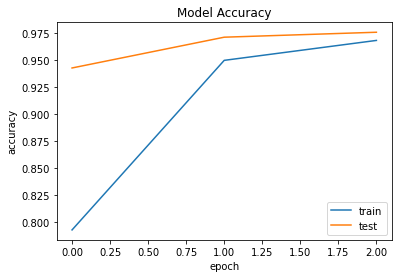

In [12]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
